In ensemble learning, voting combines the predictions of multiple models to improve accuracy. There are two main types:

->Majority Voting (Hard Voting): Each model votes for a class, and the class with the most votes is chosen.
->Weighted Voting (Soft Voting): Each model assigns probabilities to classes, and these probabilities are averaged. The class with the highest average probability is chosen.
Voting helps reduce errors and improve model performance by leveraging the strengths of different models.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score


In [3]:
can=load_iris()
df=pd.DataFrame(can.data,columns=can.feature_names)
df['target']=can.target

In [4]:
df.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
41,4.5,2.3,1.3,0.3,0
69,5.6,2.5,3.9,1.1,1
122,7.7,2.8,6.7,2.0,2


In [5]:
X=can.data[:,0:2]
y=can.target


In [6]:
X_train ,X_test,y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
model1=LogisticRegression()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8222222222222222


<Axes: >

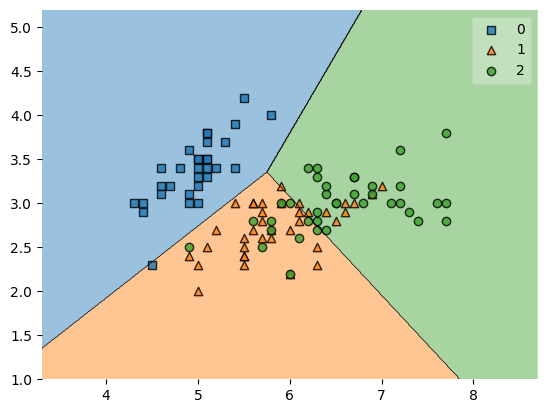

In [8]:
plot_decision_regions(X_train,y_train,clf=model1)

0.7555555555555555


<Axes: >

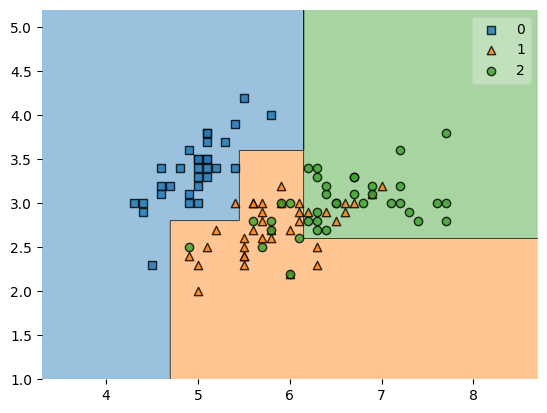

In [24]:
model2=DecisionTreeClassifier(max_leaf_nodes=8)
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
print(accuracy_score(y_test,y_pred))
plot_decision_regions(X_train,y_train,clf=model2)

0.8


<Axes: >

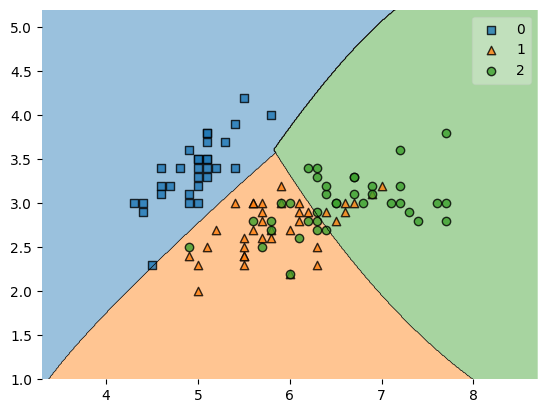

In [25]:
model3=SVC()
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
print(accuracy_score(y_test,y_pred))
plot_decision_regions(X_train,y_train,clf=model3)

 Majority voting


In [29]:
from sklearn.ensemble import VotingClassifier


In [36]:
estimators=[
    ('model1',LogisticRegression()),
    ('model2',DecisionTreeClassifier(max_leaf_nodes=8)),
    ('model3',SVC())
]


0.8


<Axes: >

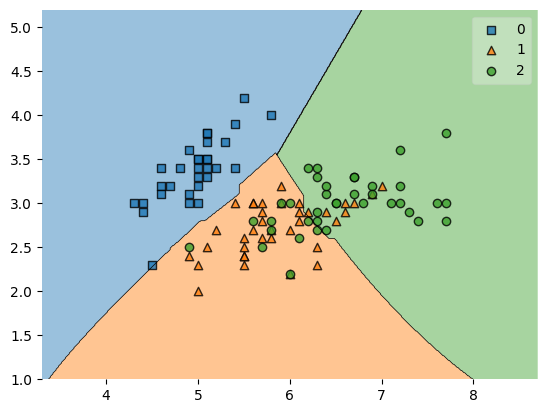

In [38]:
model=VotingClassifier(estimators=estimators,voting='hard')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))
plot_decision_regions(X_train,y_train,clf=model)

Weighted voting

0.8


<Axes: >

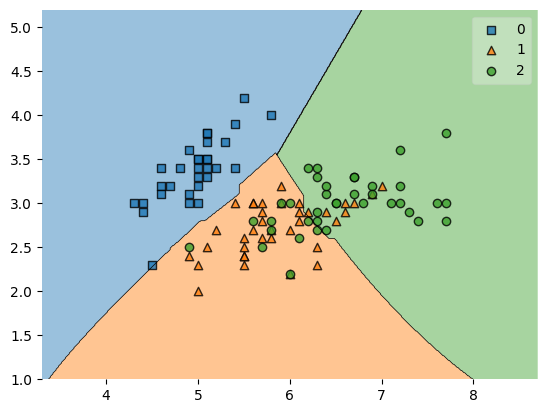

In [62]:
model=VotingClassifier(estimators=estimators,weights=[82,70,78])
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))
plot_decision_regions(X_train,y_train,clf=model)